In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('/content/train_loan (1).csv')

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
df.shape

(614, 13)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Dropping loan id**

In [93]:
df.drop('Loan_ID',axis=1,inplace=True)

In [94]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Handling null values**

In [95]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing categorical variables with mode

In [96]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [97]:
df.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing Numerical features

In [98]:
df['Dependents']= df['Dependents'].str.strip('+')



In [99]:
df['Dependents'].unique()


array(['0', '1', '2', '3', nan], dtype=object)

In [100]:
df['Dependents']=df['Dependents'].astype('float')

(array([345., 102., 152.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

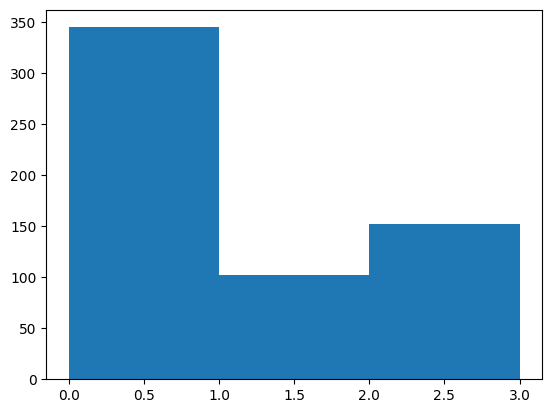

In [101]:
plt.hist(df['Dependents'],bins=3)

In [102]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].median())

(array([ 72., 310., 143.,  33.,  15.,   6.,   5.,   3.,   3.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <BarContainer object of 10 artists>)

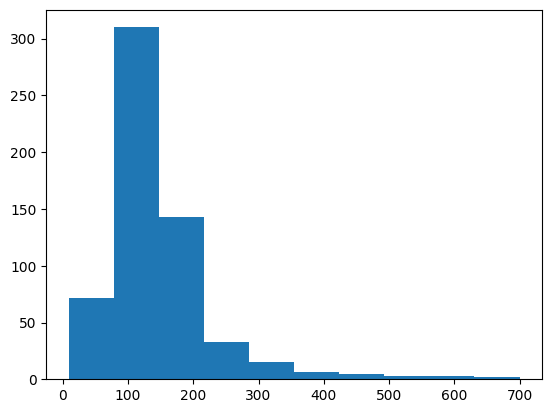

In [103]:
plt.hist(df['LoanAmount'])

In [104]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [105]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

(array([ 89., 475.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

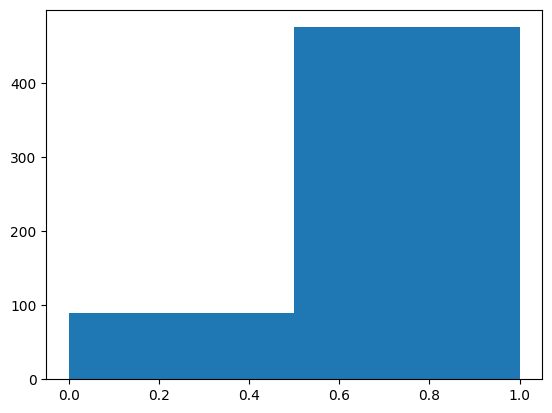

In [106]:
plt.hist(df['Credit_History'],bins=2)

In [107]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [108]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Splitting x and y**

In [109]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

**Encoding x**

Label Encoding

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
le=LabelEncoder()

In [112]:
x['Gender']=le.fit_transform(x['Gender'])

In [113]:
x['Married']=le.fit_transform(x['Married'])

In [114]:
x['Self_Employed']=le.fit_transform(x['Self_Employed'])

One hot encoding

In [115]:
x=pd.get_dummies(x,columns=['Education'])

In [116]:
x=pd.get_dummies(x,columns=['Property_Area'])

In [117]:
x.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,5849,0.0,128.0,360.0,1.0,1,0,0,0,1
1,1,1,1.0,0,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0
2,1,1,0.0,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,1
3,1,1,0.0,0,2583,2358.0,120.0,360.0,1.0,0,1,0,0,1
4,1,0,0.0,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,1


**Encoding y**

In [118]:
y=le.fit_transform(y)

In [119]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

**Scaling**

In [120]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [121]:
x.loc[:,['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=mm.fit_transform(x[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']])

In [122]:
x.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0.0,0,0.070489,0.000000,0.172214,0.74359,1.0,1,0,0,0,1
1,1,1,1.0,0,0.054830,0.036192,0.172214,0.74359,1.0,1,0,1,0,0
2,1,1,0.0,1,0.035250,0.000000,0.082489,0.74359,1.0,1,0,0,0,1
3,1,1,0.0,0,0.030093,0.056592,0.160637,0.74359,1.0,0,1,0,0,1
4,1,0,0.0,0,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,1


**Train Test Split**

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

**Decision Tree**

In [124]:
from sklearn.tree import DecisionTreeClassifier

Using entropy criterion

In [125]:
dtc=DecisionTreeClassifier(criterion='entropy')

In [126]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [127]:
y_pred=dtc.predict(x_test)

In [128]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [129]:
confusion_matrix(y_test,y_pred)

array([[28, 26],
       [21, 79]])

In [130]:
accuracy_score(y_test,y_pred)

0.6948051948051948

In [131]:
precision_score(y_test,y_pred)

0.7523809523809524

In [132]:
recall_score(y_test,y_pred)

0.79

In [133]:
f1_score(y_test,y_pred)

0.7707317073170733

Uisng gini criterian

In [134]:
dtc=DecisionTreeClassifier(criterion='gini')

In [135]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [136]:
y_pred=dtc.predict(x_test)

In [137]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [138]:
confusion_matrix(y_test,y_pred)

array([[22, 32],
       [22, 78]])

In [139]:
accuracy_score(y_test,y_pred)

0.6493506493506493

In [140]:
precision_score(y_test,y_pred)

0.7090909090909091

In [141]:
recall_score(y_test,y_pred)

0.78

In [142]:
f1_score(y_test,y_pred)

0.7428571428571428

[Text(0.38661858974358976, 0.9736842105263158, 'x[8] <= 0.5\ngini = 0.42\nsamples = 460\nvalue = [138, 322]'),
 Text(0.125, 0.9210526315789473, 'x[5] <= 0.195\ngini = 0.14\nsamples = 66\nvalue = [61, 5]'),
 Text(0.09294871794871795, 0.868421052631579, 'x[4] <= 0.052\ngini = 0.117\nsamples = 64\nvalue = [60, 4]'),
 Text(0.0673076923076923, 0.8157894736842105, 'x[7] <= 0.487\ngini = 0.048\nsamples = 41\nvalue = [40, 1]'),
 Text(0.05448717948717949, 0.7631578947368421, 'x[4] <= 0.03\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.041666666666666664, 0.7105263157894737, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0673076923076923, 0.7105263157894737, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.08012820512820513, 0.7631578947368421, 'gini = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.11858974358974358, 0.8157894736842105, 'x[4] <= 0.06\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(0.10576923076923077, 0.7631578947368421, 'x[3] <= 0.5\ngini = 0.375\nsamples = 

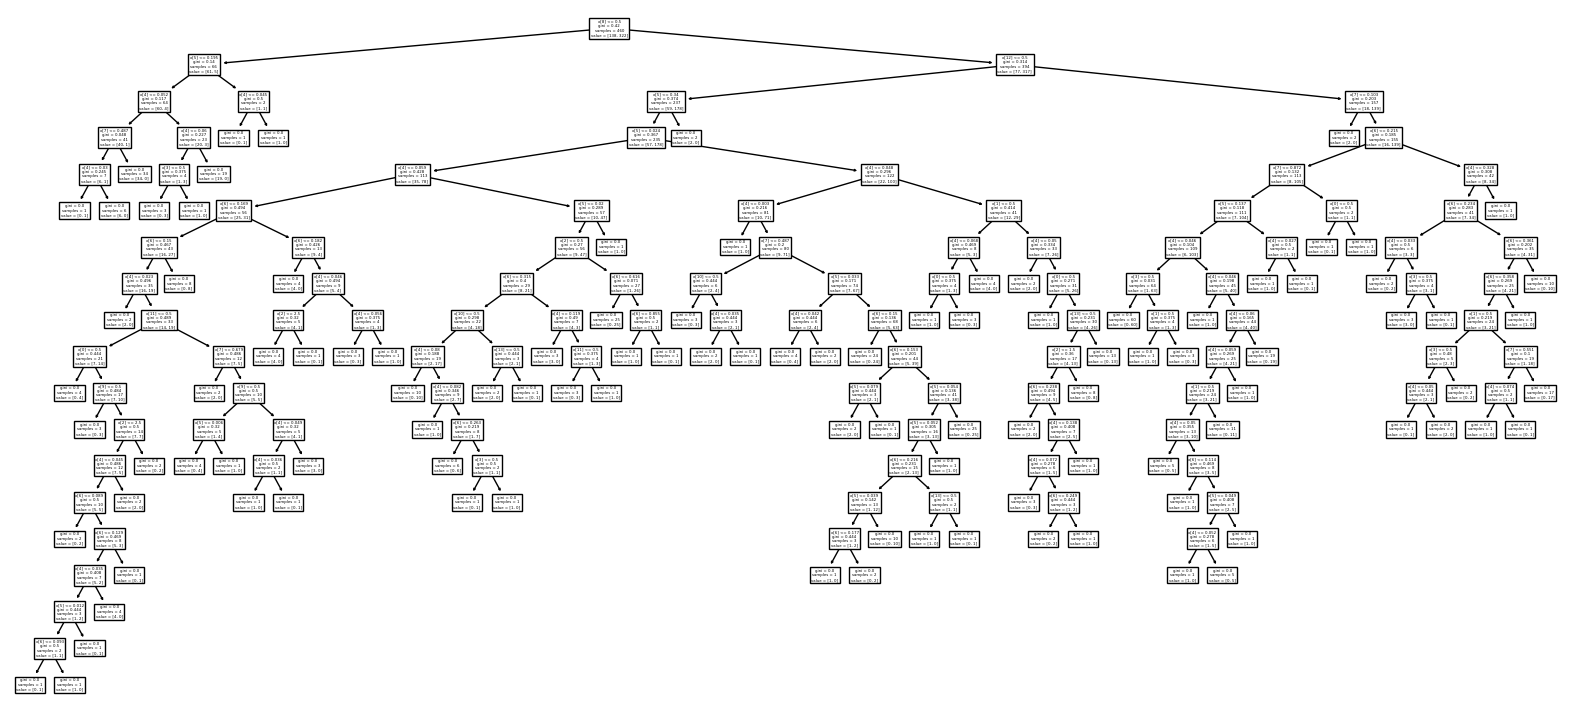

In [143]:
from sklearn import tree
plt.figure(figsize=(20,9))
tree.plot_tree(dtc)

**Random Forest-Bagging Method**

In [144]:
from sklearn.ensemble import RandomForestClassifier

In [145]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [146]:
y_pred=rfc.predict(x_test)

In [147]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [148]:
confusion_matrix(y_test,y_pred)

array([[23, 31],
       [ 6, 94]])

In [149]:
accuracy_score(y_test,y_pred)

0.7597402597402597

In [150]:
precision_score(y_test,y_pred)

0.752

In [151]:
recall_score(y_test,y_pred)

0.94

In [152]:
f1_score(y_test,y_pred)

0.8355555555555555

**Boosting Method**

AdaBoost

In [153]:
from sklearn.ensemble import AdaBoostClassifier

In [154]:
abc=AdaBoostClassifier(n_estimators=10)

In [155]:
abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [156]:
y_pred=abc.predict(x_test)

In [157]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [158]:
confusion_matrix(y_test,y_pred)

array([[24, 30],
       [ 3, 97]])

In [159]:
accuracy_score(y_test,y_pred)

0.7857142857142857

In [160]:
precision_score(y_test,y_pred)

0.7637795275590551

In [161]:
recall_score(y_test,y_pred)

0.97

In [162]:
f1_score(y_test,y_pred)

0.8546255506607929

Gradient Boost

In [163]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)

In [164]:
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [165]:
y_pred_gb=gb_clf.predict(x_test)
accuracy_score(y_test,y_pred_gb)

0.7597402597402597

xgboost

In [166]:
import xgboost as xgb

In [167]:
xgb_clf=xgb.XGBClassifier()

In [168]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [169]:
y_pred_xgb=xgb_clf.predict(x_test)

In [170]:
accuracy_score(y_test,y_pred_xgb)

0.7532467532467533